# **Latar Belakang**

---
Dalam dunia bisnis makanan cepat saji, khususnya dalam industri pizza, analisis data penjualan memainkan peran penting. Keberhasilan suatu restoran pizza tidak hanya bergantung pada kualitas makanan yang mereka sajikan, tetapi juga pada bagaimana mereka memahami dan merespon tren penjualan serta preferensi pelanggan. Untuk membantu restoran pizza tetap kompetitif, analisis data penjualan memainkan peran penting dalam memahami pola penjualan dan memaksimalkan pendapatan.

# Table of Contents

---

* order_id: Pengidentifikasi unik untuk setiap pesanan yang dilakukan oleh tabel
* order_details_id: Pengidentifikasi unik untuk setiap pizza yang dilakukan dalam setiap pesanan (pizza dengan jenis dan ukuran yang sama disimpan dalam baris yang sama, dan jumlahnya bertambah)
* pizza_id: Pengidentifikasi kunci unik yang menghubungkan pizza yang dipesan dengan detailnya, seperti ukuran dan harga
* quantity: Jumlah yang dipesan untuk setiap pizza dengan jenis dan ukuran yang sama
* order_date: Tanggal pesanan dilakukan (dimasukkan ke dalam sistem sebelum dimasak & disajikan)
* order_time: Waktu pesanan dilakukan (dimasukkan ke dalam sistem sebelum dimasak & disajikan)
* unit_price: Harga pizza dalam USD
* total_price: unit_price * kuantitas
* pizza_size: Ukuran pizza (Kecil, Sedang, Besar, X Besar, atau XX Besar)
* pizza_type: Pengidentifikasi kunci unik yang menghubungkan pizza yang dipesan dengan detailnya, seperti ukuran dan harga
* pizza_ingredients: bahan-bahan yang digunakan dalam pizza seperti yang ditampilkan di menu (semuanya berisi Keju Mozzarella, meskipun tidak disebutkan; dan semuanya berisi Saus Tomat, kecuali jika ada saus lain yang disebutkan)
* pizza_name: Nama pizza seperti yang ditampilkan di menu

# **Contents**

---
1. Total Orderan Berdasarkan Jam, Hari, dan Bulan
2. Pendapatan Hasil Penjualan Per Bulan
3. Penjualan Berdasarkan Ukuran Pizza
4. Penjualan Berdasarkan Kategori Pizza
5. Pizza Names and Prices
6. Jumlah Pesanan Per Bulan Berdasarkan Hari
7. Waktu Pesanan Berdasarkan Tanggal Pesanan
8. Distribusi Pendapatan Berdasarkan Kategori dan Ukuran Pizza

# **IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Loading Dataset**

In [ ]:
df = pd.read_excel('Pizza_Sales.xlsx', header=0)
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


# **EXPLORATORY DATA ANALYSIS**

---



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [ ]:
df.shape

(48620, 12)

In [ ]:
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
order_details_id,0
order_id,0
pizza_id,0
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,0


In [ ]:
df.describe()

,order_details_id,order_id,quantity,order_date,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,2015-06-29 11:03:43.611682560,16.494132,16.821474
min,1.000000,1.000000,1.000000,2015-01-01 00:00:00,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,2015-03-31 00:00:00,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,2015-06-28 00:00:00,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,2015-09-28 00:00:00,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,2015-12-31 00:00:00,35.950000,83.000000
std,14035.529381,6180.119770,0.143077,NaN,3.621789,4.437398


# **Data Visualization**

---



**Total Orderan Berdasarkan Jam, Hari, dan Bulan**

In [ ]:
df['order_time']=df['order_time'].astype('string')
df[['Hour','Minute', 'Second']]= df['order_time'].str.split(":",expand=True)
df["Hour"].value_counts()

,count
Hour,
12,6543
13,6203
18,5359
17,5143
19,4350
16,4185
14,3521
20,3487
15,3170


<ipython-input-153-a588ec79315f>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




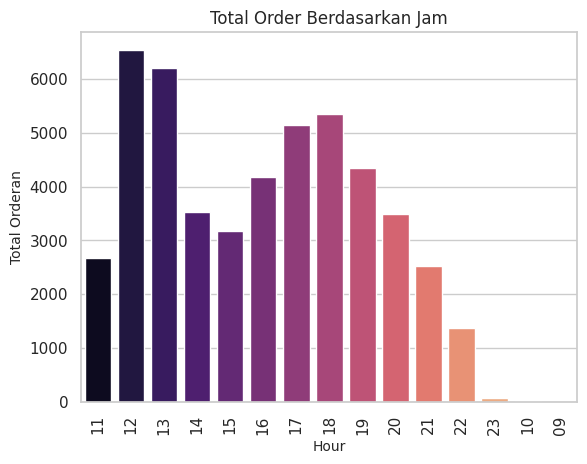

In [ ]:
sns.countplot(data=df,x="Hour",palette="magma")
plt.xticks(rotation=90)
plt.xlabel("Hour",fontsize=10)
plt.ylabel("Total Orderan",fontsize=10)
plt.title("Total Order Berdasarkan Jam")
plt.show()

In [ ]:
df['order_year'] =pd.DatetimeIndex( df['order_date']).year
df['order_year'].value_counts()

,count
order_year,
2015,48620


In [ ]:
df['order_dates'] = df['order_date'].dt.day_name()
df['order_dates'].value_counts()

,count
order_dates,
Friday,8106
Saturday,7355
Thursday,7323
Wednesday,6797
Tuesday,6753
Monday,6369
Sunday,5917


<ipython-input-156-c263761a7a6d>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




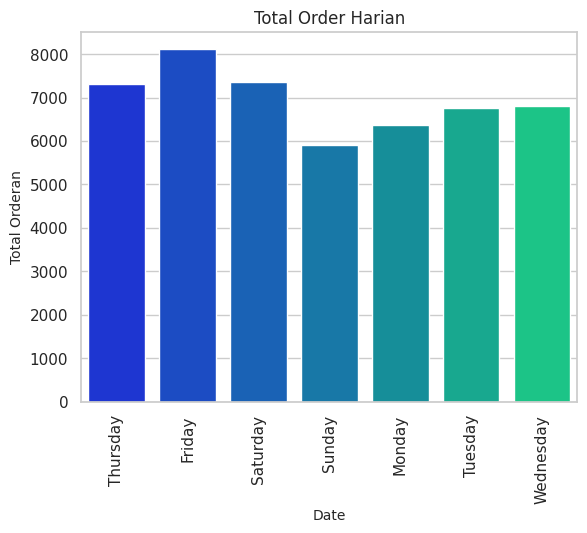

In [ ]:
sns.countplot(data=df,x="order_dates",palette="winter")
plt.xticks(rotation=90)
plt.xlabel("Date",fontsize=10)
plt.ylabel("Total Orderan",fontsize=10)
plt.title("Total Order Harian")
plt.show()

In [ ]:
df['order_month'] =pd.DatetimeIndex (df['order_date']).month
df.loc[(df['order_month'] ==1), 'order_month'] = 'January'
df.loc[(df['order_month'] ==2), 'order_month'] = 'February'
df.loc[(df['order_month'] ==3), 'order_month'] = 'March'
df.loc[(df['order_month'] ==4), 'order_month'] = 'April'
df.loc[(df['order_month'] ==5), 'order_month'] = 'May'
df.loc[(df['order_month'] ==6), 'order_month'] = 'June'
df.loc[(df['order_month'] ==7), 'order_month'] = 'July'
df.loc[(df['order_month'] ==8), 'order_month'] = 'August'
df.loc[(df['order_month'] ==9), 'order_month'] = 'September'
df.loc[(df['order_month'] ==10), 'order_month'] = 'October'
df.loc[(df['order_month'] ==11), 'order_month'] = 'November'
df.loc[(df['order_month'] ==12), 'order_month'] = 'December'
df['order_month'].value_counts()

<ipython-input-157-8870e2b21857>:2: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'January' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.



,count
order_month,
July,4301
May,4239
March,4186
November,4185
January,4156
August,4094
April,4067
June,4025
February,3892


<ipython-input-158-3b2dfca14a76>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




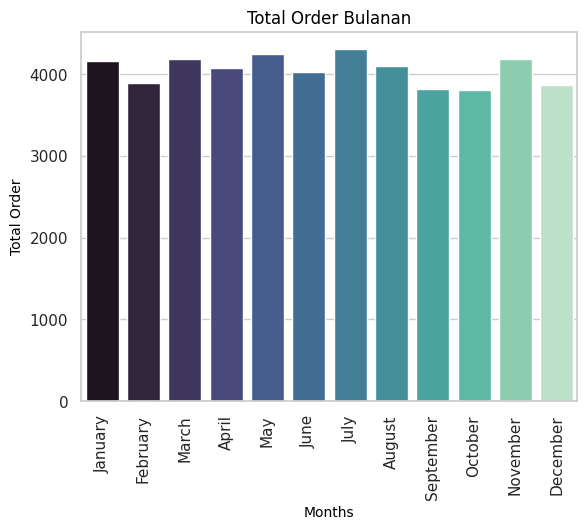

In [ ]:
sns.countplot(data=df,x="order_month",palette="mako")
plt.xticks(rotation=90)
plt.xlabel("Months",fontsize=10,color="black")
plt.ylabel("Total Order",fontsize=10,color="black")
plt.title("Total Order Bulanan",color="black")
plt.show()

In [ ]:
df.pizza_id.value_counts()

,count
pizza_id,
big_meat_s,1811
thai_ckn_l,1365
five_cheese_l,1359
four_cheese_l,1273
classic_dlx_m,1159
...,...
mexicana_s,160
calabrese_s,99
ckn_alfredo_s,96


<ipython-input-160-8f784f8c7d12>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




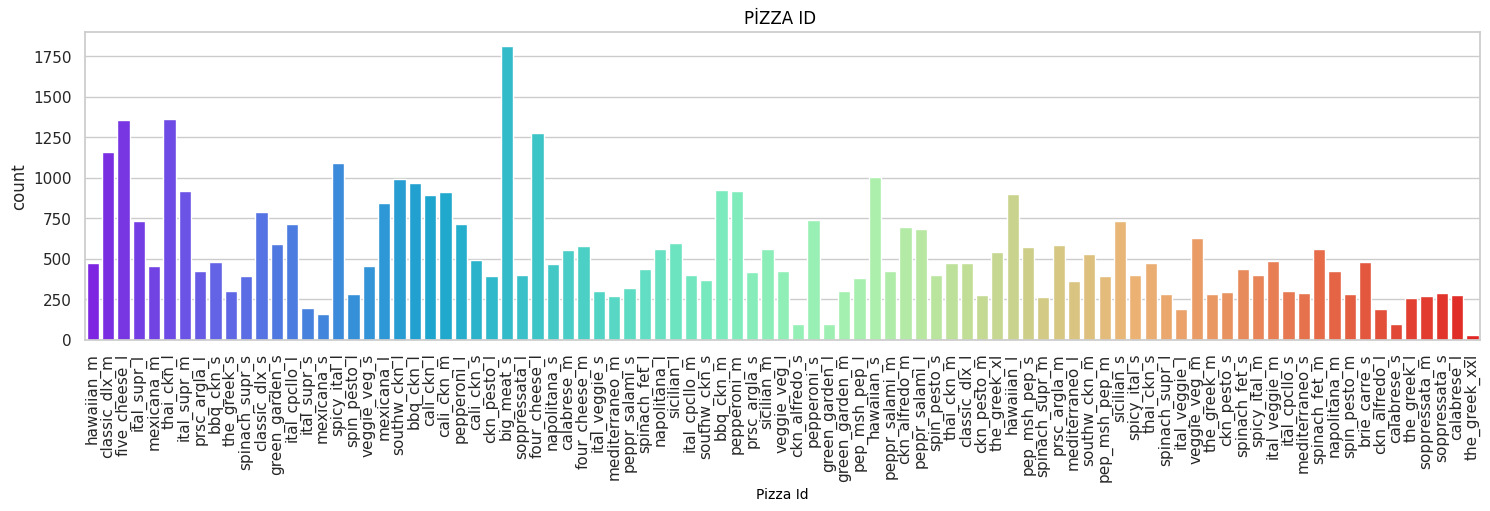

In [ ]:
fig, ax = plt.subplots(figsize=(18, 4))
sns.countplot(data=df,x="pizza_id",palette="rainbow",ax=ax)
plt.xticks(rotation=90)
plt.xlabel("Pizza Id",fontsize=10,color="black")
plt.title("PİZZA ID ",color="black")
plt.show()

**Pendapatan Hasil Penjualan Per Bulan**

---



In [ ]:
pendapatan_per_bulan = df.groupby(pd.to_datetime(df['order_date']).dt.strftime('%B'))['total_price'].sum()
pendapatan_per_bulan

,total_price
order_date,
April,68736.80
August,68278.25
December,64701.15
February,65159.60
January,69793.30
July,72557.90
June,68230.20
March,70397.10
May,71402.75


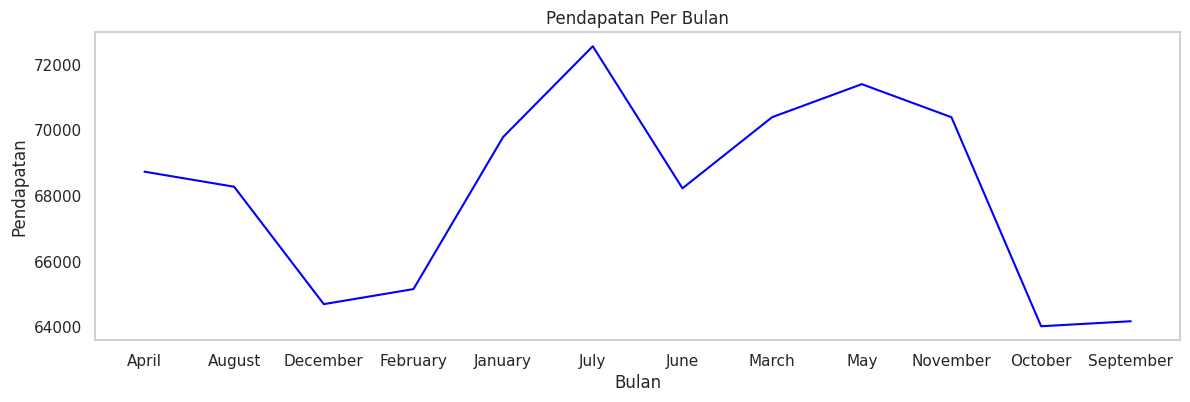

In [ ]:
plt.figure(figsize=(14,4))
plt.plot(pendapatan_per_bulan.index, pendapatan_per_bulan.values, color="blue")
plt.title('Pendapatan Per Bulan')
plt.xlabel("Bulan")
plt.ylabel("Pendapatan")
plt.grid()
plt.show()

**Penjualan Berdasarkan Ukuran Pizza**

---



In [ ]:
df.pizza_size.value_counts()

,count
pizza_size,
L,18526
M,15385
S,14137
XL,544
XXL,28


<ipython-input-164-d651c3e4f960>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




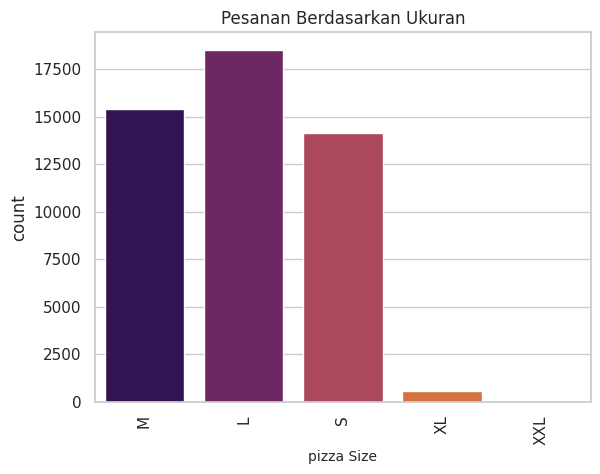

In [ ]:
sns.countplot(data=df,x="pizza_size",palette="inferno")
plt.xticks(rotation=90)
plt.xlabel("pizza Size",fontsize=10)
plt.title("Pesanan Berdasarkan Ukuran")
plt.show()

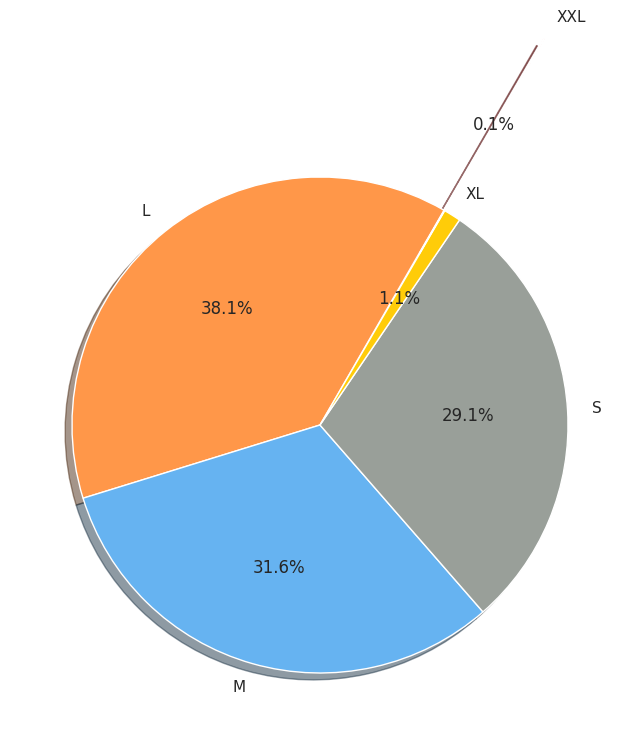

In [ ]:
labels = df["pizza_size"].value_counts().index
sizes = df["pizza_size"].value_counts()
plt.figure(figsize = (8,10))

colors = ['#ff9749','#66b3f1','#999f99','#ffcc09',"RED","cyan"]
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors, shadow=True, startangle=60,explode=(0,0,0,0,0.8))
plt.show()

**Penjualan Berdasarkan Kategori Pizza**

---



In [ ]:
df.pizza_category.value_counts()

,count
pizza_category,
Classic,14579
Supreme,11777
Veggie,11449
Chicken,10815


<ipython-input-167-d62ad2f39b0e>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




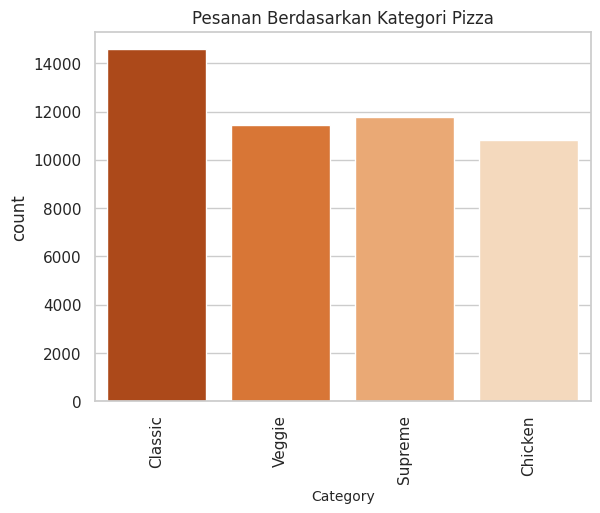

In [ ]:
sns.countplot(data=df,x="pizza_category",palette="Oranges_r")
plt.xticks(rotation=90)
plt.xlabel("Category",fontsize=10)
plt.title("Pesanan Berdasarkan Kategori Pizza")
plt.show()

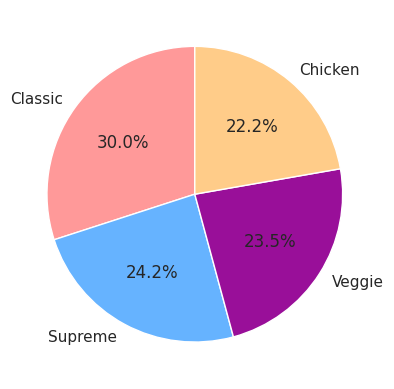

In [ ]:
labels = df["pizza_category"].value_counts().index
sizes = df["pizza_category"].value_counts()
colors = ['#ff9999','#66b3ff','#990f99','#ffcc89',"pink","yellow"]
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors, startangle=90)
plt.show()

**Pizza Names and Prices**

---



In [ ]:
df.pizza_name.value_counts()

,count
pizza_name,
The Classic Deluxe Pizza,2416
The Barbecue Chicken Pizza,2372
The Hawaiian Pizza,2370
The Pepperoni Pizza,2369
The Thai Chicken Pizza,2315
The California Chicken Pizza,2302
The Sicilian Pizza,1887
The Spicy Italian Pizza,1887
The Southwest Chicken Pizza,1885


<ipython-input-170-fe06d2fb27a8>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




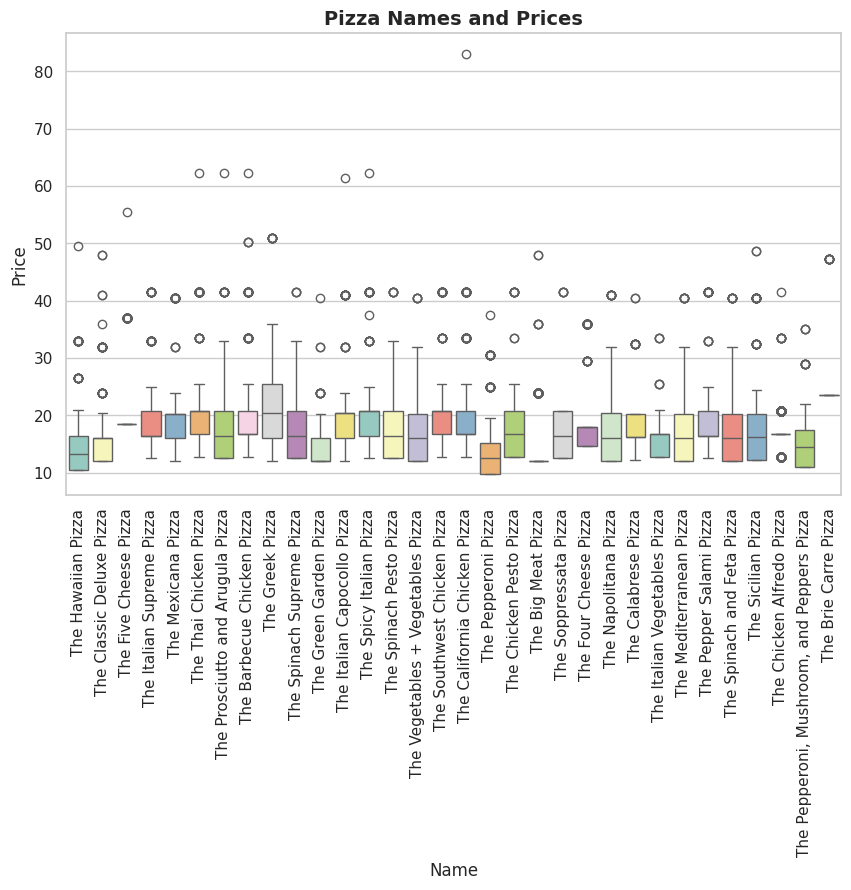

In [ ]:
# Membuat boxplot menggunakan Seaborn
plt.figure(figsize=(10, 6))  # Mengatur ukuran gambar
sns.boxplot(data=df, x='pizza_name', y='total_price', palette='Set3')

# Menambahkan label dan judul
plt.xlabel('Name', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Pizza Names and Prices', fontsize=14, fontweight='bold')

# Rotasi label x untuk membuatnya lebih terbaca jika kategorinya banyak
plt.xticks(rotation=90)

# Tampilkan plot
plt.show()

**Jumlah Pesanan Per Bulan Berdasarkan Hari**

---



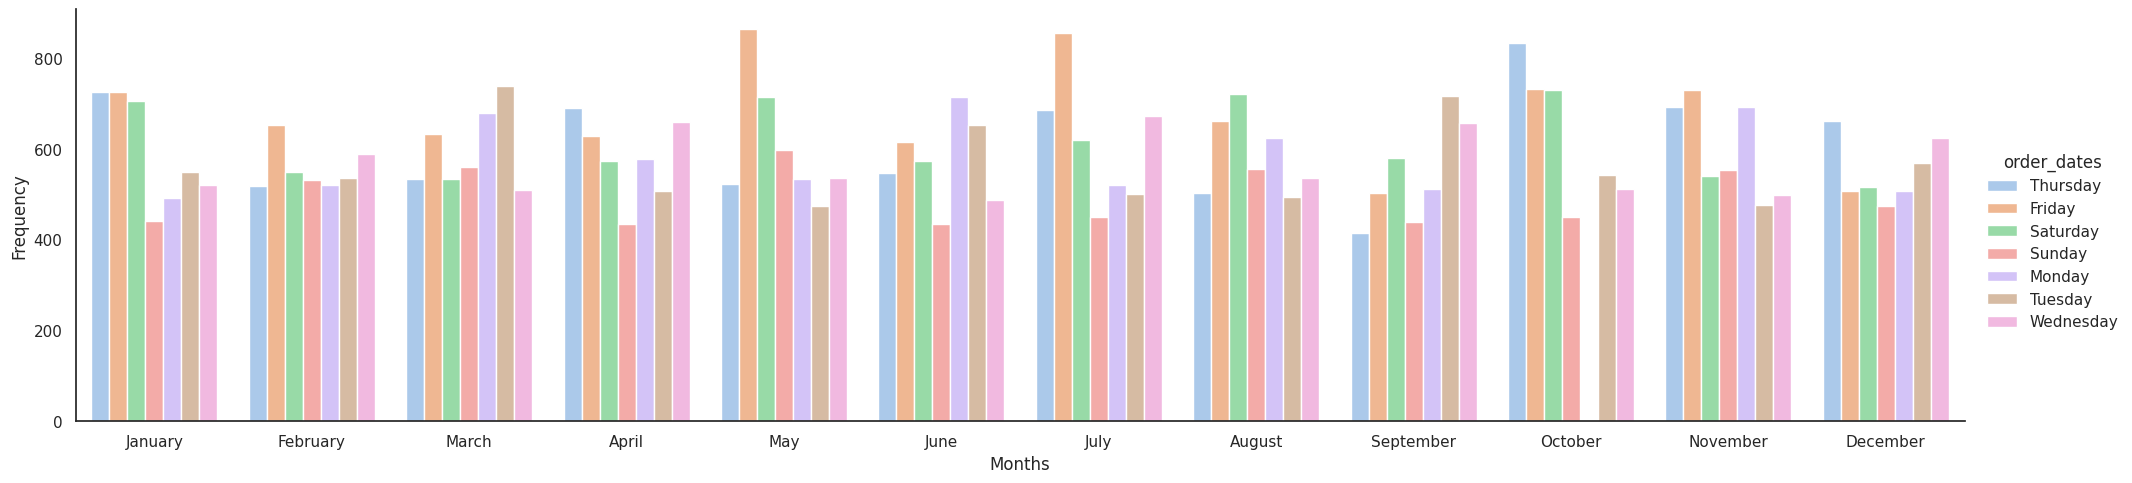

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot(x="order_month", data=df, aspect=4.0, kind='count', hue='order_dates', palette="pastel")

# Menambahkan label sumbu
g.set_ylabels('Frequency')
g.set_xlabels("Months")

# Tampilkan plot
plt.show()

**Waktu Pesanan Berdasarkan Tanggal Pesanan**

---



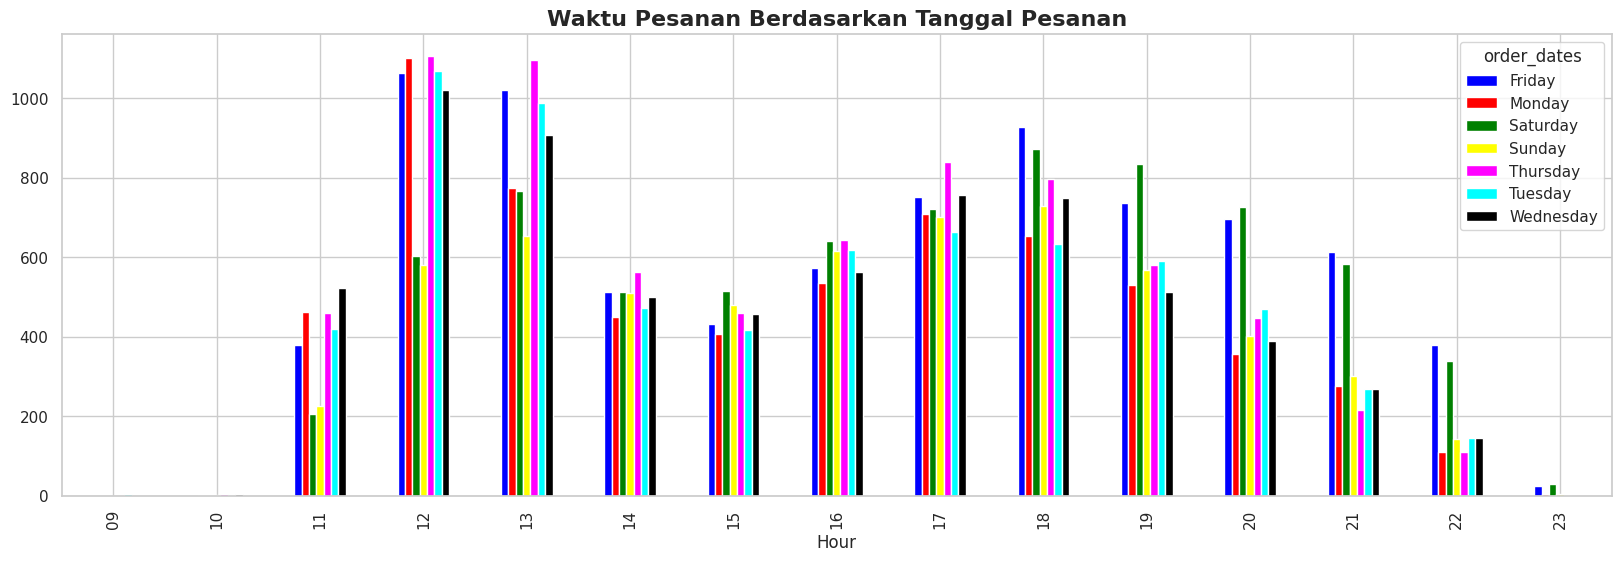

In [ ]:
# Membuat crosstab dan plot
pd.crosstab(df["Hour"], df["order_dates"]).plot(
    kind="bar",
    figsize=(20, 6),
    color=["blue", "red", "green", "yellow", "magenta", "cyan", "black", "orange"]
)

# Menambahkan judul pada plot
plt.title("Waktu Pesanan Berdasarkan Tanggal Pesanan", fontsize=16, fontweight='bold')
plt.xticks(rotation=90)  # Mengatur rotasi label sumbu x jika perlu
plt.show()


**Distribusi Pendapatan Berdasarkan Kategori dan Ukuran Pizza**

---



In [ ]:
joint_data=df.sort_values(by='total_price', ascending=False)

top_rated=joint_data[:]
fig =px.sunburst(
    top_rated,
    path=['pizza_category',"pizza_size"],
    values='total_price',
    color='total_price')
fig.show()

In [ ]:
df1 = df.groupby(["pizza_size","pizza_category"],as_index=False)[['total_price']].median().rename(columns={'total_price':'price'})
fig = px.treemap(df1, path = [px.Constant("all"), "pizza_size","pizza_category"],
                 values   ='price', color='pizza_size',
                 color_discrete_map={'(?)':'lightgrey', 'Lunch':'gold', 'Dinner':'darkblue'})
fig.update_layout(margin  = dict(t=50, l=25, r=25, b=25))
fig.show()

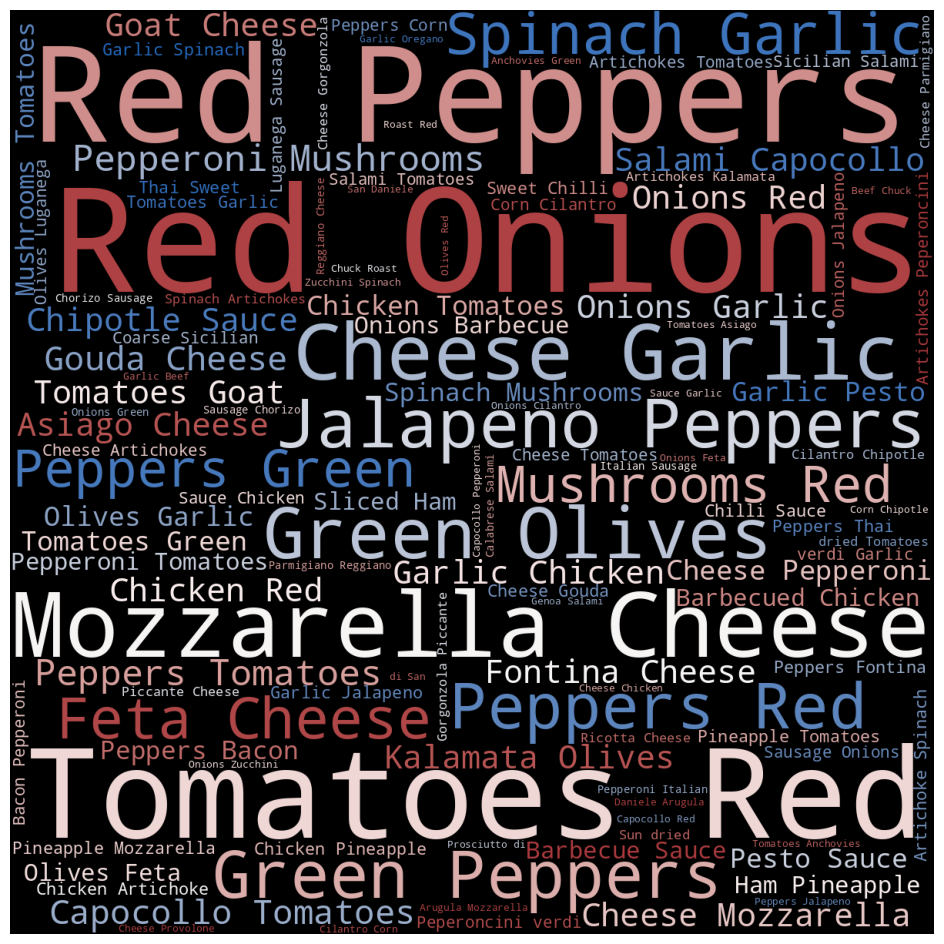

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud # import the WordCloud object from the wordcloud module

text = ' '.join(df['pizza_ingredients'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
plt.show()

# **Result**

---
* Restoran biasanya paling ramai saat jam makan siang, terutama antara pukul 12 hingga 13.
* Jumlah pesanan meningkat terjadi pada hari Jumat.
* Pendapatan hasil penjualan paling tinggi di bulan July
* Penjualan pizza didominasi oleh ukuran L, yang menjadi ukuran paling populer di antara semua pilihan.
* Pesanan berdasarkan kategori pizza menunjukkan bahwa pizza klasik umumnya lebih disukai.
* Tomat, paprika merah, dan bawang merah biasanya ada di hampir semua jenis pizza.
* Meskipun toko pizza ini buka pukul 9, jumlah pesanan pada pukul 9 hampir tidak ada.